In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist

In [3]:
(x_train_full,y_train_full),(x_test,y_test) = data.load_data()


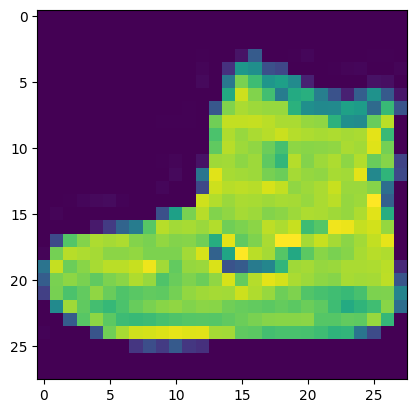

In [4]:
plt.imshow(x_train_full[0])

### Data Normalization

In [5]:
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

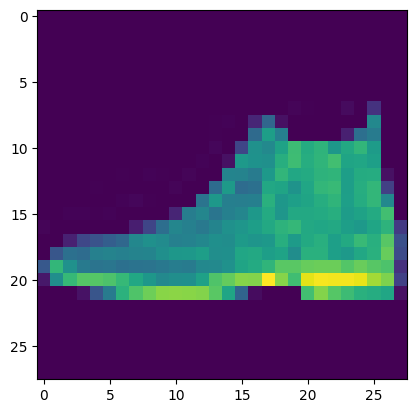

In [6]:
plt.imshow(x_test[0])

### Validation, Train, Test

In [7]:
x_train = x_train_full[:5000]
y_train = y_train_full[:5000]

x_valid = x_train_full[5000:]
y_valid = y_train_full[5000:]


In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()

In [10]:
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
import pydot
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
import pydot

In [14]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
model.compile(loss= 'sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [16]:
model_h = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=30)

Epoch 1/30
157/157 [==============================] - 12s 66ms/step - loss: 1.4525 - accuracy: 0.5626 - val_loss: 1.0439 - val_accuracy: 0.6731
Epoch 2/30
157/157 [==============================] - 7s 42ms/step - loss: 0.8845 - accuracy: 0.7142 - val_loss: 0.8491 - val_accuracy: 0.7124
Epoch 3/30
157/157 [==============================] - 7s 46ms/step - loss: 0.7362 - accuracy: 0.7594 - val_loss: 0.7346 - val_accuracy: 0.7456
Epoch 4/30
157/157 [==============================] - 6s 39ms/step - loss: 0.6584 - accuracy: 0.7834 - val_loss: 0.6808 - val_accuracy: 0.7666
Epoch 5/30
157/157 [==============================] - 6s 36ms/step - loss: 0.6098 - accuracy: 0.7936 - val_loss: 0.6955 - val_accuracy: 0.7606
Epoch 6/30
157/157 [==============================] - 6s 37ms/step - loss: 0.5795 - accuracy: 0.8104 - val_loss: 0.6040 - val_accuracy: 0.7904
Epoch 7/30
157/157 [==============================] - 6s 36ms/step - loss: 0.5521 - accuracy: 0.8166 - val_loss: 0.5913 - val_accuracy: 0.790

(0.0, 1.0)

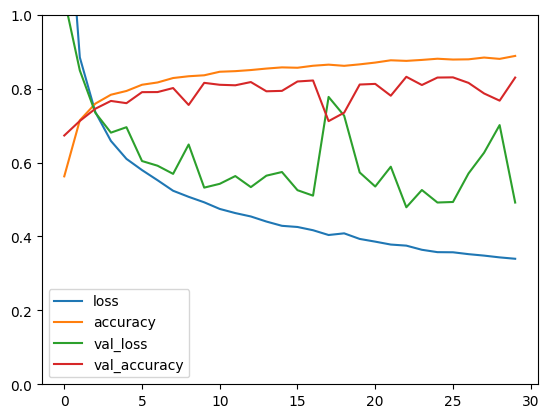

In [17]:
pd.DataFrame(model_h.history).plot()
plt.ylim(0,1)

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5145 - accuracy: 0.8205


[0.5144643783569336, 0.8205000162124634]

In [19]:
y_pred = model.predict(x_test[:5])
y_pred.round(2)

1/1 [==============================] - 0s 304ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.11, 0.  , 0.88],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.11, 0.02, 0.03, 0.  , 0.78, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [21]:
model.save('Image_Classifier_Model/model.h5')